## Imports

In [1]:
import pandas as pd # Data preperation and data readings 
import numpy as np 
import matplotlib.pyplot as plt # Plots
import seaborn as sb # Prettier plots
import folium # Maps
from branca.element import Figure

## Weather Data

In [2]:
weather_ds = pd.read_csv("weather-data-2014-2019.csv",header=None)
weather_ds_copy = weather_ds[:-1].copy()
weather_ds_copy.drop(weather_ds.columns[[2,3,4,6,7,8,9,10,12,14,16,18,20,22,23,24,26,27,28,29,30]],axis=1,inplace=True)
weather_ds_copy.head()

C:\Users\eskil\Anaconda3\envs\california\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


0         1  5     11    13    15  17  19  21   25
0  2  1/1/2014  0  64.7  29.4  44.2  74  30  53  2.5
1  2  1/2/2014  0  63.9  28.2  44.3  68  31  51    3
2  2  1/3/2014  0  64.1    30    45  75  31  53  2.7
3  2  1/4/2014  0  63.5  31.3  44.6  74  32  54  3.1
4  2  1/5/2014  0  64.4  29.1  44.4  72  34  57    3

In [3]:

weather_ds_copy.columns = ['Station Number','Date', 'Precipitation','Maximum Air Temperature','Minimum Air Temperature','Average Air Temperature','Maximum Relative Humidity','Minimum Relative Humidity','Average Relative Humidity','Average Wind Speed']
weather_ds_copy.tail()

Station Number        Date Precipitation Maximum Air Temperature  \
324272            261  12/27/2019             0                    39.6   
324273            261  12/28/2019             0                      43   
324274            261  12/29/2019          0.02                    42.2   
324275            261  12/30/2019             0                    43.6   
324276            261  12/31/2019             0                    35.9   

       Minimum Air Temperature Average Air Temperature  \
324272                    15.1                    25.2   
324273                    18.7                    30.3   
324274                    25.3                    34.9   
324275                    25.1                      32   
324276                    22.7                    32.2   

       Maximum Relative Humidity Minimum Relative Humidity  \
324272                        94                        64   
324273                        95                        59   
324274                        96                        72   
324275                       100                        78   
324276                       100                        96   

       Average Relative Humidity Average Wind Speed  
324272                        87                  2  
324273                        84                  2  
324274                        89                  3  
324275                        96                2.4  
324276                       100                2.5

In [4]:
float_value_list = ["Maximum Air Temperature", "Minimum Air Temperature", "Precipitation", "Average Air Temperature", "Maximum Relative Humidity", "Minimum Relative Humidity", "Average Relative Humidity"]
for val in float_value_list:
    weather_ds_copy[val] = pd.to_numeric(weather_ds_copy[val],errors='coerce')
weather_ds_copy.head()

Station Number      Date  Precipitation  Maximum Air Temperature  \
0              2  1/1/2014            0.0                     64.7   
1              2  1/2/2014            0.0                     63.9   
2              2  1/3/2014            0.0                     64.1   
3              2  1/4/2014            0.0                     63.5   
4              2  1/5/2014            0.0                     64.4   

   Minimum Air Temperature  Average Air Temperature  \
0                     29.4                     44.2   
1                     28.2                     44.3   
2                     30.0                     45.0   
3                     31.3                     44.6   
4                     29.1                     44.4   

   Maximum Relative Humidity  Minimum Relative Humidity  \
0                       74.0                       30.0   
1                       68.0                       31.0   
2                       75.0                       31.0   
3                       74.0                       32.0   
4                       72.0                       34.0   

   Average Relative Humidity Average Wind Speed  
0                       53.0                2.5  
1                       51.0                  3  
2                       53.0                2.7  
3                       54.0                3.1  
4                       57.0                  3

In [5]:

for column in ['Minimum Air Temperature','Maximum Air Temperature','Average Air Temperature']:
    new_temperature = []
    for v in weather_ds_copy[column]:
        if v == '--':
            new_temperature.append(None)
            continue
        celsius = round((v-32) * (5/9),1)
        new_temperature.append(celsius)
    weather_ds_copy[column] = new_temperature
weather_ds_copy.head()


Station Number      Date  Precipitation  Maximum Air Temperature  \
0              2  1/1/2014            0.0                     18.2   
1              2  1/2/2014            0.0                     17.7   
2              2  1/3/2014            0.0                     17.8   
3              2  1/4/2014            0.0                     17.5   
4              2  1/5/2014            0.0                     18.0   

   Minimum Air Temperature  Average Air Temperature  \
0                     -1.4                      6.8   
1                     -2.1                      6.8   
2                     -1.1                      7.2   
3                     -0.4                      7.0   
4                     -1.6                      6.9   

   Maximum Relative Humidity  Minimum Relative Humidity  \
0                       74.0                       30.0   
1                       68.0                       31.0   
2                       75.0                       31.0   
3                       74.0                       32.0   
4                       72.0                       34.0   

   Average Relative Humidity Average Wind Speed  
0                       53.0                2.5  
1                       51.0                  3  
2                       53.0                2.7  
3                       54.0                3.1  
4                       57.0                  3

In [6]:
weather_ds_copy["Date"] = pd.to_datetime(weather_ds_copy["Date"])
weather_ds_copy.head()

Station Number       Date  Precipitation  Maximum Air Temperature  \
0              2 2014-01-01            0.0                     18.2   
1              2 2014-01-02            0.0                     17.7   
2              2 2014-01-03            0.0                     17.8   
3              2 2014-01-04            0.0                     17.5   
4              2 2014-01-05            0.0                     18.0   

   Minimum Air Temperature  Average Air Temperature  \
0                     -1.4                      6.8   
1                     -2.1                      6.8   
2                     -1.1                      7.2   
3                     -0.4                      7.0   
4                     -1.6                      6.9   

   Maximum Relative Humidity  Minimum Relative Humidity  \
0                       74.0                       30.0   
1                       68.0                       31.0   
2                       75.0                       31.0   
3                       74.0                       32.0   
4                       72.0                       34.0   

   Average Relative Humidity Average Wind Speed  
0                       53.0                2.5  
1                       51.0                  3  
2                       53.0                2.7  
3                       54.0                3.1  
4                       57.0                  3

In [7]:
station_ds = pd.read_excel('CIMIS Stations List (January20).xlsx')
station_ds = station_ds[:-1]
station_ds.head()

Station Number DWR Regional Office*                  Name      County  \
0             1.0                 SCRO    Fresno/F.S.U. USDA      Fresno   
1             2.0                 SCRO         Five Points        Fresno   
2             3.0                 SCRO  Beach /Santa Cruz CO  Santa Cruz   
3             4.0                 SCRO   Webb /Santa Cruz CO  Santa Cruz   
4             5.0                 SCRO          Shafter/USDA        Kern   

    Latitude   Longitude   ELEV    Status    Connect           Disconnect  
0  36.814000 -119.732000  340.0  Inactive 1982-06-07  1988-09-25 00:00:00  
1  36.336222 -120.112906  285.0    Active 1982-06-07               Active  
2  36.881000 -121.793000   10.0  Inactive 1982-05-30  1986-08-25 00:00:00  
3  36.972000 -121.726000  230.0  Inactive 1982-05-30  1988-04-29 00:00:00  
4  35.532695 -119.281862  360.0    Active 1982-06-01               Active

In [8]:
station_ds_copy = station_ds.copy()
station_ds_copy.drop(station_ds_copy.columns[[1,2,6,7,8,9]],axis=1,inplace=True)
station_ds_copy.head()

Station Number      County   Latitude   Longitude
0             1.0      Fresno  36.814000 -119.732000
1             2.0      Fresno  36.336222 -120.112906
2             3.0  Santa Cruz  36.881000 -121.793000
3             4.0  Santa Cruz  36.972000 -121.726000
4             5.0        Kern  35.532695 -119.281862

In [9]:


for station in station_ds_copy['Station Number']:
    if station not in weather_ds_copy['Station Number'].unique():
        station_ds_copy = station_ds_copy[station_ds_copy['Station Number'] != station]
station_ds_copy




Station Number          County   Latitude   Longitude
1               2.0          Fresno  36.336222 -120.112906
4               5.0            Kern  35.532695 -119.281862
5               6.0            Yolo  38.535794 -121.776385
6               7.0          Fresno  36.851248 -120.590980
11             12.0           Butte  39.608639 -121.824431
..              ...             ...        ...         ...
252           253.0       San Mateo  37.255333 -122.370800
253           254.0         Alameda  37.718167 -122.197111
254           255.0  San Bernardino  33.985350 -117.656528
255           256.0     Los Angeles  34.759475 -117.991997
256           257.0            Kern  35.659128 -117.636925

[168 rows x 4 columns]

In [10]:
merged_weather_ds = weather_ds_copy.merge(station_ds_copy, left_on='Station Number',right_on='Station Number')
merged_weather_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294912 entries, 0 to 294911
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Station Number             294912 non-null  object        
 1   Date                       294912 non-null  datetime64[ns]
 2   Precipitation              290694 non-null  float64       
 3   Maximum Air Temperature    289517 non-null  float64       
 4   Minimum Air Temperature    288598 non-null  float64       
 5   Average Air Temperature    289435 non-null  float64       
 6   Maximum Relative Humidity  290347 non-null  float64       
 7   Minimum Relative Humidity  290347 non-null  float64       
 8   Average Relative Humidity  284425 non-null  float64       
 9   Average Wind Speed         294912 non-null  object        
 10  County                     294912 non-null  object        
 11  Latitude                   294912 non-null  float64 

In [11]:
merged_weather_ds.groupby(['County','Date']).mean()




Precipitation  Maximum Air Temperature  \
County  Date                                                 
Alameda 2014-01-01           0.00                    18.30   
        2014-01-02           0.00                    18.60   
        2014-01-03           0.00                    19.20   
        2014-01-04           0.00                    18.85   
        2014-01-05           0.00                    18.75   
...                           ...                      ...   
Yuba    2019-12-27           0.00                    14.50   
        2019-12-28           0.00                    12.60   
        2019-12-29           0.09                    11.30   
        2019-12-30           0.01                    16.10   
        2019-12-31           0.00                    14.50   

                    Minimum Air Temperature  Average Air Temperature  \
County  Date                                                           
Alameda 2014-01-01                     -1.2                     6.75   
        2014-01-02                      0.3                     8.10   
        2014-01-03                      1.6                     8.40   
        2014-01-04                      0.7                     8.00   
        2014-01-05                     -0.9                     7.65   
...                                     ...                      ...   
Yuba    2019-12-27                      0.9                     7.90   
        2019-12-28                      0.9                     6.40   
        2019-12-29                      3.6                     7.90   
        2019-12-30                      1.3                     9.10   
        2019-12-31                      2.8                     9.20   

                    Maximum Relative Humidity  Minimum Relative Humidity  \
County  Date                                                               
Alameda 2014-01-01                       94.5                       33.0   
        2014-01-02                       90.5                       32.5   
        2014-01-03                       90.0                       31.5   
        2014-01-04                       94.0                       32.0   
        2014-01-05                       82.5                       28.0   
...                                       ...                        ...   
Yuba    2019-12-27                       68.0                       34.0   
        2019-12-28                       88.0                       54.0   
        2019-12-29                       97.0                       62.0   
        2019-12-30                       98.0                       38.0   
        2019-12-31                       87.0                       38.0   

                    Average Relative Humidity   Latitude   Longitude  
County  Date                                                          
Alameda 2014-01-01                       65.5  37.631363 -121.969133  
        2014-01-02                       62.0  37.631363 -121.969133  
        2014-01-03                       64.5  37.631363 -121.969133  
        2014-01-04                       63.5  37.631363 -121.969133  
        2014-01-05                       53.5  37.631363 -121.969133  
...                                       ...        ...         ...  
Yuba    2019-12-27                       52.0  39.252561 -121.315669  
        2019-12-28                       69.0  39.252561 -121.315669  
        2019-12-29                       80.0  39.252561 -121.315669  
        2019-12-30                       74.0  39.252561 -121.315669  
        2019-12-31                       71.0  39.252561 -121.315669  

[91713 rows x 9 columns]

## Fire Dataset

OPPGAVER: 

1. wildfires per month
2. wildfires avg acresburned per year

In [12]:
ds = pd.read_csv("California_Fire_Incidents.csv")
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AcresBurned           1633 non-null   float64
 1   Active                1636 non-null   bool   
 2   AdminUnit             1636 non-null   object 
 3   AirTankers            28 non-null     float64
 4   ArchiveYear           1636 non-null   int64  
 5   CalFireIncident       1636 non-null   bool   
 6   CanonicalUrl          1636 non-null   object 
 7   ConditionStatement    284 non-null    object 
 8   ControlStatement      111 non-null    object 
 9   Counties              1636 non-null   object 
 10  CountyIds             1636 non-null   object 
 11  CrewsInvolved         171 non-null    float64
 12  Dozers                123 non-null    float64
 13  Engines               191 non-null    float64
 14  Extinguished          1577 non-null   object 
 15  Fatalities           

In [13]:
firedep_ds = pd.read_excel("CalFireDepartments.xlsx")

firedep_ds.head()

Department Name   Latitude   Longitude
0          Butte County Unit  39.644268 -121.800067
1  San Mateo-Santa Cruz Unit  37.512188 -122.338668
2          Fresno Kings Unit  36.676022 -119.616011
3          Lassen-Modoc Unit  40.424895 -120.677065
4             San Diego Unit  32.749183 -116.926775

In [14]:
cols=["Location", "SearchDescription", "SearchKeywords", 
"CanonicalUrl", "Final", "Featured", "FuelType", "Updated", 
"StructuresEvacuated", "Active", "ConditionStatement", 
"ControlStatement", "Public", "PercentContained", "Status"]
ds_copy = ds.copy()

ds_copy = ds_copy.drop(cols, axis = 1)
ds_copy["Extinguished"] = pd.to_datetime(ds_copy["Extinguished"])
ds_copy["Started"] = pd.to_datetime(ds_copy["Started"])
ds_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   AcresBurned           1633 non-null   float64            
 1   AdminUnit             1636 non-null   object             
 2   AirTankers            28 non-null     float64            
 3   ArchiveYear           1636 non-null   int64              
 4   CalFireIncident       1636 non-null   bool               
 5   Counties              1636 non-null   object             
 6   CountyIds             1636 non-null   object             
 7   CrewsInvolved         171 non-null    float64            
 8   Dozers                123 non-null    float64            
 9   Engines               191 non-null    float64            
 10  Extinguished          1577 non-null   datetime64[ns, UTC]
 11  Fatalities            21 non-null     float64            
 12  Helico

In [15]:
# Segmentating data and adding aditional information.

# Add the time of the fire duration.
ds_copy["FireDuration"] = -(ds_copy["Started"]-ds_copy["Extinguished"])

#Segmentating the data based on how big (how many acres burned) the wild fire is.
meanAcresBurned = ds_copy["AcresBurned"].mean()
ds_copy.loc[ds_copy["AcresBurned"]>meanAcresBurned+10000, "WildfireSize"] = "BigWildfire"
ds_copy.loc[ds_copy["AcresBurned"]<=meanAcresBurned+10000, "WildfireSize"] = "AvgWildfire"
ds_copy.loc[ds_copy["AcresBurned"]<=meanAcresBurned-2000, "WildfireSize"] = "SmallWildfire"
ds_copy.head()

AcresBurned                                          AdminUnit  AirTankers  \
0     257314.0  Stanislaus National Forest/Yosemite National Park         NaN   
1      30274.0  USFS Angeles National Forest/Los Angeles Count...         NaN   
2      27531.0  CAL FIRE Riverside Unit / San Bernardino Natio...         NaN   
3      27440.0                              Tahoe National Forest         NaN   
4      24251.0                       Ventura County Fire/CAL FIRE         NaN   

   ArchiveYear  CalFireIncident     Counties CountyIds  CrewsInvolved  Dozers  \
0         2013             True     Tuolumne        55            NaN     NaN   
1         2013             True  Los Angeles        19            NaN     NaN   
2         2013             True    Riverside        33            NaN     NaN   
3         2013            False       Placer        31            NaN     NaN   
4         2013             True      Ventura        56           47.0     8.0   

   Engines  ...             Name  PersonnelInvolved                   Started  \
0      NaN  ...         Rim Fire                NaN 2013-08-17 15:25:00+00:00   
1      NaN  ...  Powerhouse Fire                NaN 2013-05-30 15:28:00+00:00   
2      NaN  ...    Mountain Fire                NaN 2013-07-15 13:43:00+00:00   
3      NaN  ...    American Fire                NaN 2013-08-10 16:30:00+00:00   
4    117.0  ...     Springs Fire             2167.0 2013-05-02 07:01:00+00:00   

   StructuresDamaged  StructuresDestroyed  StructuresThreatened  \
0                NaN                  NaN                   NaN   
1                NaN                  NaN                   NaN   
2                NaN                  NaN                   NaN   
3                NaN                  NaN                   NaN   
4                6.0                 10.0                   NaN   

                               UniqueId WaterTenders     FireDuration  \
0  5fb18d4d-213f-4d83-a179-daaf11939e78          NaN 20 days 03:05:00   
1  bf37805e-1cc2-4208-9972-753e47874c87          NaN  9 days 03:02:00   
2  a3149fec-4d48-427c-8b2c-59e8b79d59db          NaN 15 days 04:17:00   
3  8213f5c7-34fa-403b-a4bc-da2ace6e6625          NaN 19 days 15:30:00   
4  46731fb8-3350-4920-bdf7-910ac0eb715c         11.0  8 days 23:29:00   

  WildfireSize  
0  BigWildfire  
1  BigWildfire  
2  BigWildfire  
3  BigWildfire  
4  BigWildfire  

[5 rows x 27 columns]

In [16]:
# Add additional column with bool value where the av fire duration is lower than the mean of dataset without outliers.
lowerOutlier = ds_copy["FireDuration"].quantile(0.05) # Remove lower outliers
upperOutlier = ds_copy["FireDuration"].quantile(0.95) # Remove upper outliers
ds_copy1 = ds_copy[(ds_copy["FireDuration"]>lowerOutlier) & (ds_copy["FireDuration"]<upperOutlier)] # New dataset for mean without outliers
meanFireDuration = ds_copy1["FireDuration"].mean() # Mean of new dataset

ds_copy.loc[ds_copy["FireDuration"]>meanFireDuration, "Fast Extinguishing"] = False
ds_copy.loc[ds_copy["FireDuration"]<=meanFireDuration, "Fast Extinguishing"] = True

# map values 0 to false and 1 to true
ds_copy["Fast Extinguishing"] = ds_copy["Fast Extinguishing"].astype("bool")
ds_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   AcresBurned           1633 non-null   float64            
 1   AdminUnit             1636 non-null   object             
 2   AirTankers            28 non-null     float64            
 3   ArchiveYear           1636 non-null   int64              
 4   CalFireIncident       1636 non-null   bool               
 5   Counties              1636 non-null   object             
 6   CountyIds             1636 non-null   object             
 7   CrewsInvolved         171 non-null    float64            
 8   Dozers                123 non-null    float64            
 9   Engines               191 non-null    float64            
 10  Extinguished          1577 non-null   datetime64[ns, UTC]
 11  Fatalities            21 non-null     float64            
 12  Helico

In [17]:
# Drop rows where the longitude and latitude is outside California
# California Latitude: 32 to 42
# California Longitude: -114 to -124
ds_copy = ds_copy[ds_copy.Latitude>32]
ds_copy = ds_copy[ds_copy.Latitude<42]
ds_copy = ds_copy[ds_copy.Longitude<-114]
ds_copy = ds_copy[ds_copy.Longitude>-124]

## Models

Text(0, 0.5, 'Amount of Wildfires')

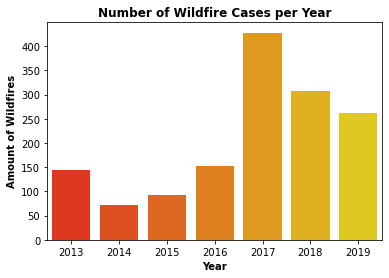

In [18]:
# Number of wildfires per year
plt.title("Number of Wildfire Cases per Year", fontdict=dict(weight='bold'))
numWildfires = sb.countplot(x="ArchiveYear", data=ds_copy, palette="autumn")
numWildfires.set_xlabel(xlabel='Year', fontdict=dict(weight='bold'))
numWildfires.set_ylabel(ylabel='Amount of Wildfires', fontdict=dict(weight='bold'))

Text(0, 0.5, 'Acres Burned')

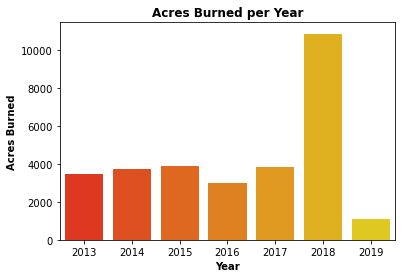

In [19]:
plt.title("Acres Burned per Year", fontdict=dict(weight="bold"))
acresBurnedPerYear = sb.barplot(x="ArchiveYear", y="AcresBurned", data=ds_copy, ci=0, palette="autumn")
acresBurnedPerYear.set_xlabel(xlabel= "Year", fontdict=dict(weight='bold'))
acresBurnedPerYear.set_ylabel(ylabel='Acres Burned', fontdict=dict(weight='bold'))

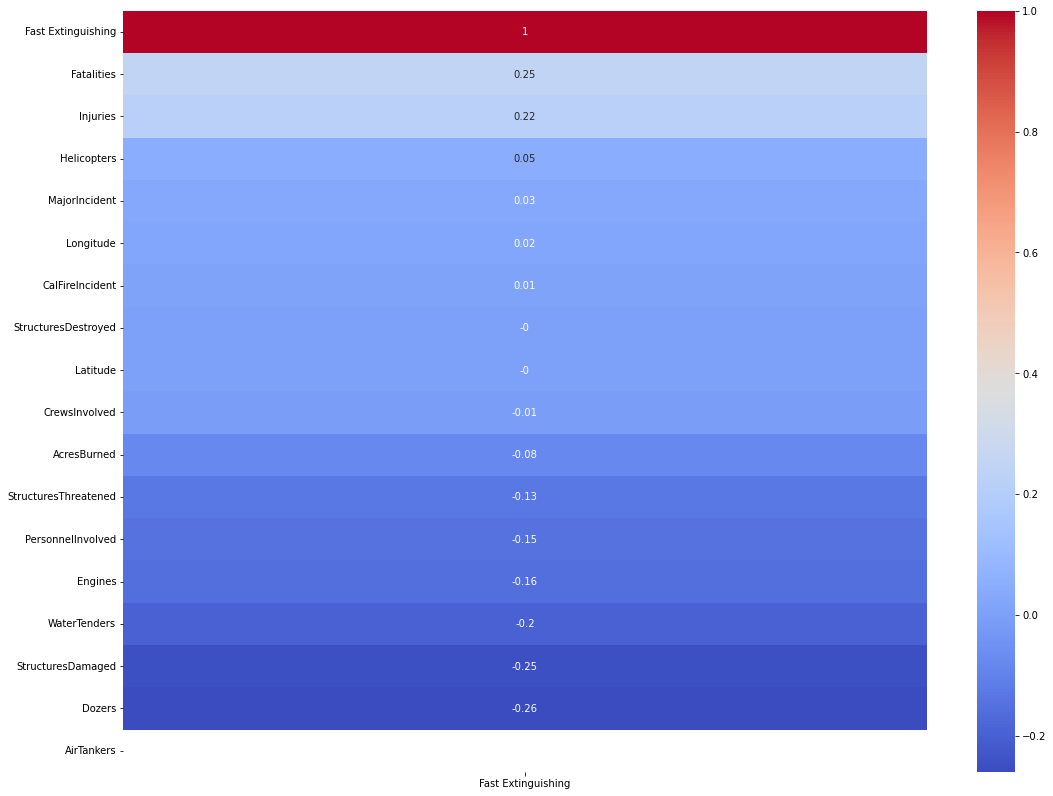

In [20]:
# Correlation between columns and "Fast Extinguishing"
corr_ds = ds_copy.drop(["UniqueId", "Counties", "CountyIds", "Extinguished", "Started", "Name", "FireDuration", "AdminUnit", "WildfireSize", "ArchiveYear"], axis=1)
x = round(corr_ds.corr(),2)
plt.figure(figsize=(18,14))
sb.heatmap(x[["Fast Extinguishing"]].sort_values(by=["Fast Extinguishing"], ascending=False), cmap='coolwarm', annot=True)
plt.show()

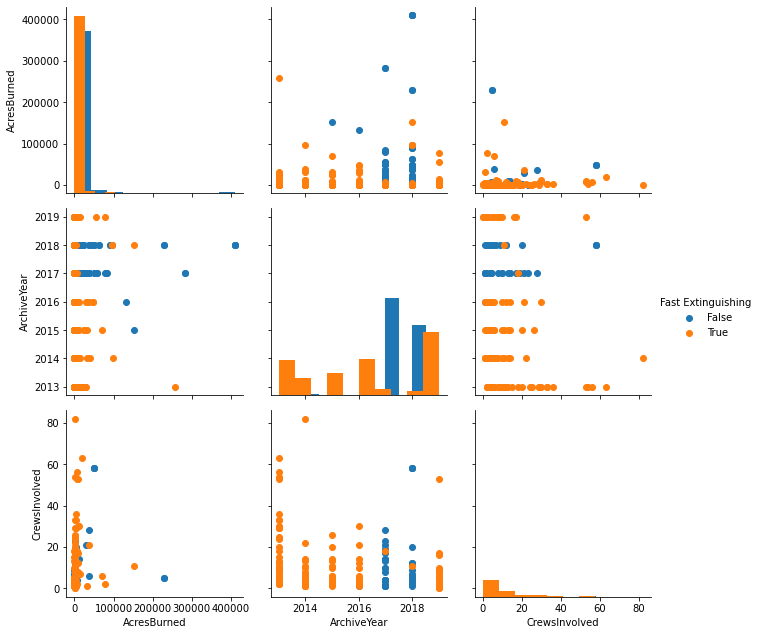

In [21]:
# Pair plot columns from the dataset and show for which wildfire size they are from
pairplot = sb.PairGrid(data=ds_copy, vars = ["AcresBurned", "ArchiveYear", "CrewsInvolved"], hue="Fast Extinguishing", height=3)
pairplot.map_diag(plt.hist)
pairplot.map_offdiag(plt.scatter)
pairplot.add_legend()

In [22]:
# Create a folium map and place a circle in the map for each of the wildfires from 2013-2020 with a larger radius depending on how big the wildfire was 
# ; uncomment the layercontrol line if you want other maptypes
fig=Figure(width=550,height=350)

map = folium.Map(location=[36.778259, -119.417931], zoom_start=5)
fig.add_child(map)
folium.TileLayer('Stamen Terrain').add_to(map)
#folium.LayerControl().add_to(map)
for i in range (0, ds_copy.shape[0]):
  r = np.sqrt(ds_copy.iloc[i]["AcresBurned"])*20
  folium.Circle(location=[ds_copy.iloc[i]["Latitude"], ds_copy.iloc[i]["Longitude"]], radius=r, color = "red", fill_color = "orange").add_to(map)
map

In [23]:
# Create a folium map for each of the wildfires under the category of "BigWildfire"; uncomment the layercontrol line if you want other maptypes
from folium.plugins import MarkerCluster
fig2=Figure(width=550,height=350)

bigFireMap = folium.Map(location=[36.778259, -119.417931], zoom_start=5)
cluster_marker = MarkerCluster().add_to(bigFireMap)
fig2.add_child(bigFireMap)
folium.TileLayer('Stamen Terrain').add_to(bigFireMap)
#folium.LayerControl().add_to(bigFireMap)
for i in range (0, ds_copy.shape[0]):
  r = np.sqrt(ds_copy.iloc[i]["AcresBurned"])/20
  if ds_copy.iloc[i]["WildfireSize"] == "BigWildfire":
    folium.CircleMarker(location=[ds_copy.iloc[i]["Latitude"], ds_copy.iloc[i]["Longitude"]], radius=r, color = "red", fill_color = "orange").add_to(cluster_marker)
bigFireMap

In [24]:
# Heat maps with visualization of County CAL units
from folium import plugins
from folium.plugins import HeatMap
fig3=Figure(width=1200,height=900)

heat_map = folium.Map(location=[36,-120], zoom_start=5)

fig3.add_child(heat_map)
folium.TileLayer('Stamen Terrain').add_to(heat_map)

HeatMap(data=ds_copy[['Latitude', 'Longitude']], radius=15).add_to(folium.FeatureGroup(name='Heat Map').add_to(heat_map))
folium.LayerControl().add_to(heat_map)
for i in range (0, firedep_ds.shape[0]):
    #folium.Circle(location=[firedep_ds.iloc[i]["Latitude"], firedep_ds.iloc[i]["Longitude"]], radius=500, color = "black", fill=True, fill_opacity= 1, tooltip=firedep_ds.iloc[i]["Department Name"]).add_to(heat_map)
    folium.map.Marker(location=[firedep_ds.iloc[i]["Latitude"], firedep_ds.iloc[i]["Longitude"]], icon=folium.Icon(color="black", icon="fire-extinguisher", prefix="fa"), tooltip=firedep_ds.iloc[i]["Department Name"]).add_to(heat_map)
heat_map # display

In [25]:
# Create a folium map and place a circle in the map for each of the wildfires from 2013-2020 with a larger radius depending on how big the wildfire was 
# ; uncomment the layercontrol line if you want other maptypes
fig=Figure(width=550,height=350)

hot_spot = folium.Map(location=[36.778259, -119.417931], zoom_start=5)
cluster_marker = MarkerCluster().add_to(hot_spot)
fig.add_child(hot_spot)
folium.TileLayer('Stamen Terrain').add_to(hot_spot)
#folium.LayerControl().add_to(map)
for i in range (0, ds_copy.shape[0]):
  r = np.sqrt(ds_copy.iloc[i]["AcresBurned"])/50
  folium.CircleMarker(location=[ds_copy.iloc[i]["Latitude"], ds_copy.iloc[i]["Longitude"]], radius=r, color = "red", fill_color = "orange").add_to(cluster_marker)

for i in range (0, firedep_ds.shape[0]):
    #folium.Circle(location=[firedep_ds.iloc[i]["Latitude"], firedep_ds.iloc[i]["Longitude"]], radius=500, color = "black", fill=True, fill_opacity= 1, tooltip=firedep_ds.iloc[i]["Department Name"]).add_to(heat_map)
    folium.map.Marker(location=[firedep_ds.iloc[i]["Latitude"], firedep_ds.iloc[i]["Longitude"]], icon=folium.Icon(color="black", icon="fire-extinguisher", prefix="fa"), tooltip=firedep_ds.iloc[i]["Department Name"]).add_to(hot_spot)
hot_spot

In [26]:
# Heat maps with visualization per year
from folium import plugins
from folium.plugins import HeatMap
fig3=Figure(width=550,height=350)

heat_map2 = folium.Map(location=[36,-120], zoom_start=5)

fig3.add_child(heat_map2)
folium.TileLayer('Stamen Terrain').add_to(heat_map2)

for val in ds_copy["ArchiveYear"].unique():
    df = ds_copy[ds_copy.ArchiveYear == val]
    HeatMap(data=df[['Latitude', 'Longitude']], radius=20).add_to(folium.FeatureGroup(name=str(val), show=False).add_to(heat_map2))


folium.LayerControl().add_to(heat_map2)

heat_map2

In [27]:
# Clustering of wildfires per year
from folium import plugins
fig=Figure(width=550,height=350)

hot_spot2 = folium.Map(location=[36.778259, -119.417931], zoom_start=5)
fig.add_child(hot_spot2)
folium.TileLayer('Stamen Terrain').add_to(hot_spot2)

for val in ds_copy["ArchiveYear"].unique():
  df = ds_copy[ds_copy.ArchiveYear == val]
  cluster_marker2 = MarkerCluster(name=str(val), show=False).add_to(hot_spot2)
  for i in range (0, df.shape[0]):
    r = np.sqrt(df.iloc[i]["AcresBurned"])/50
    folium.CircleMarker(location=[df.iloc[i]["Latitude"], df.iloc[i]["Longitude"]], radius=r, color = "red", fill_color = "orange").add_to(cluster_marker2)

folium.LayerControl().add_to(hot_spot2)

hot_spot2

[Text(0, 0, '82013'),
 Text(1, 0, '52013'),
 Text(2, 0, '72013'),
 Text(3, 0, '92013'),
 Text(4, 0, '112013'),
 Text(5, 0, '102013'),
 Text(6, 0, '62013'),
 Text(7, 0, '22013'),
 Text(8, 0, '42013'),
 Text(9, 0, '122013'),
 Text(10, 0, '92014'),
 Text(11, 0, '72014'),
 Text(12, 0, '52014'),
 Text(13, 0, '82014'),
 Text(14, 0, '62014'),
 Text(15, 0, '42014'),
 Text(16, 0, '12014'),
 Text(17, 0, '32014'),
 Text(18, 0, '102014'),
 Text(19, 0, '72015'),
 Text(20, 0, '62015'),
 Text(21, 0, '82015'),
 Text(22, 0, '92015'),
 Text(23, 0, '42015'),
 Text(24, 0, '102015'),
 Text(25, 0, '52015'),
 Text(26, 0, '22015'),
 Text(27, 0, '112015'),
 Text(28, 0, '72016'),
 Text(29, 0, '62016'),
 Text(30, 0, '82016'),
 Text(31, 0, '92016'),
 Text(32, 0, '112016'),
 Text(33, 0, '102016'),
 Text(34, 0, '52016'),
 Text(35, 0, '42016'),
 Text(36, 0, '122017'),
 Text(37, 0, '72017'),
 Text(38, 0, '82017'),
 Text(39, 0, '102017'),
 Text(40, 0, '92017'),
 Text(41, 0, '52017'),
 Text(42, 0, '62017'),
 Text(43, 0

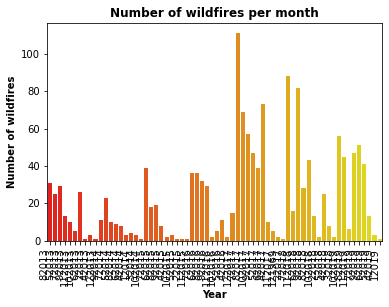

In [28]:
ds_copy["ArchiveMonth"] = pd.DatetimeIndex(ds_copy["Started"]).month.astype(str) + pd.DatetimeIndex(ds_copy["Started"]).year.astype(str)
plt.title("Number of wildfires per month", fontdict=dict(fontweight="bold"))
plt.rcParams["figure.figsize"] = (15,6)
numWildfiresPerMonth = sb.countplot(x="ArchiveMonth", data=ds_copy, palette="autumn")
numWildfiresPerMonth.set_xlabel(xlabel="Year", fontdict=dict(fontweight="bold"))
numWildfiresPerMonth.set_ylabel(ylabel="Number of wildfires", fontdict=dict(fontweight="bold"))
numWildfiresPerMonth.set_xticklabels(numWildfiresPerMonth.get_xticklabels(), rotation=90, ha="right")

In [29]:
merged_weather_ds.groupby(['County','Date','Precipitation']).mean()

Maximum Air Temperature  \
County  Date       Precipitation                            
Alameda 2014-01-01 0.00                             18.30   
        2014-01-02 0.00                             18.60   
        2014-01-03 0.00                             19.20   
        2014-01-04 0.00                             18.85   
        2014-01-05 0.00                             18.75   
...                                                   ...   
Yuba    2019-12-27 0.00                             14.50   
        2019-12-28 0.00                             12.60   
        2019-12-29 0.09                             11.30   
        2019-12-30 0.01                             16.10   
        2019-12-31 0.00                             14.50   

                                  Minimum Air Temperature  \
County  Date       Precipitation                            
Alameda 2014-01-01 0.00                              -1.2   
        2014-01-02 0.00                               0.3   
        2014-01-03 0.00                               1.6   
        2014-01-04 0.00                               0.7   
        2014-01-05 0.00                              -0.9   
...                                                   ...   
Yuba    2019-12-27 0.00                               0.9   
        2019-12-28 0.00                               0.9   
        2019-12-29 0.09                               3.6   
        2019-12-30 0.01                               1.3   
        2019-12-31 0.00                               2.8   

                                  Average Air Temperature  \
County  Date       Precipitation                            
Alameda 2014-01-01 0.00                              6.75   
        2014-01-02 0.00                              8.10   
        2014-01-03 0.00                              8.40   
        2014-01-04 0.00                              8.00   
        2014-01-05 0.00                              7.65   
...                                                   ...   
Yuba    2019-12-27 0.00                              7.90   
        2019-12-28 0.00                              6.40   
        2019-12-29 0.09                              7.90   
        2019-12-30 0.01                              9.10   
        2019-12-31 0.00                              9.20   

                                  Maximum Relative Humidity  \
County  Date       Precipitation                              
Alameda 2014-01-01 0.00                                94.5   
        2014-01-02 0.00                                90.5   
        2014-01-03 0.00                                90.0   
        2014-01-04 0.00                                94.0   
        2014-01-05 0.00                                82.5   
...                                                     ...   
Yuba    2019-12-27 0.00                                68.0   
        2019-12-28 0.00                                88.0   
        2019-12-29 0.09                                97.0   
        2019-12-30 0.01                                98.0   
        2019-12-31 0.00                                87.0   

                                  Minimum Relative Humidity  \
County  Date       Precipitation                              
Alameda 2014-01-01 0.00                                33.0   
        2014-01-02 0.00                                32.5   
        2014-01-03 0.00                                31.5   
        2014-01-04 0.00                                32.0   
        2014-01-05 0.00                                28.0   
...                                                     ...   
Yuba    2019-12-27 0.00                                34.0   
        2019-12-28 0.00                                54.0   
        2019-12-29 0.09                                62.0   
        2019-12-30 0.01                                38.0   
        2019-12-31 0.00                                38.0   

            

In [30]:
res = merged_weather_ds.set_index('Date').groupby(pd.Grouper(freq='M'))['Precipitation'].sum()
res2 = pd.DatetimeIndex(merged_weather_ds['Date']).month.astype(str) + pd.DatetimeIndex(merged_weather_ds['Date']).year.astype(str)
#ax = sb.lineplot(x = 'ArchiveMonth',y = 'MonthlyPrecipitation', data= merged_weather_ds)
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, ha='right')
print(len(res))

72


In [31]:
["ArchiveMonth"] = pd.DatetimeIndex(ds_copy["Started"]).month.astype(str) + pd.DatetimeIndex(ds_copy["Started"]).year.astype(str)
plt.title("Number of wildfires per month", fontdict=dict(fontweight="bold"))
plt.rcParams["figure.figsize"] = (15,6)
numWildfiresPerMonth = sb.countplot(x="ArchiveMonth", data=ds_copy, palette="autumn")
numWildfiresPerMonth.set_xlabel(xlabel="Year", fontdict=dict(fontweight="bold"))
numWildfiresPerMonth.set_ylabel(ylabel="Number of wildfires", fontdict=dict(fontweight="bold"))
numWildfiresPerMonth.set_xticklabels(numWildfiresPerMonth.get_xticklabels(), rotation=90, ha="right")

SyntaxError: can't assign to literal (Temp/ipykernel_2420/2023086587.py, line 1)